In [333]:
#importing require modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score

In [334]:
#Reading the data
data=pd.read_csv('/content/Parkinsson disease.csv')

In [335]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [336]:
data.dtypes.value_counts()

float64    22
object      1
int64       1
Name: count, dtype: int64

In [337]:
#exploring the dataset
#first fiverows
data.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [338]:
#last five rows
data.tail(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [339]:
data.columns
print(f'length of the data : { len(data.columns) }')

length of the data : 24


In [340]:
data.shape

(195, 24)

In [341]:
#chekking null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [342]:
#cheking the null values in the each column
#here there is no null values in the each column
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [343]:
#performing some statistical analysis
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In the data set info in the kaggle we know that is the value is 1 he/she having

the parkinson  if value is 0 he/she doesnt

having the parkinson

count of 1 : 147
count of 0 : 48



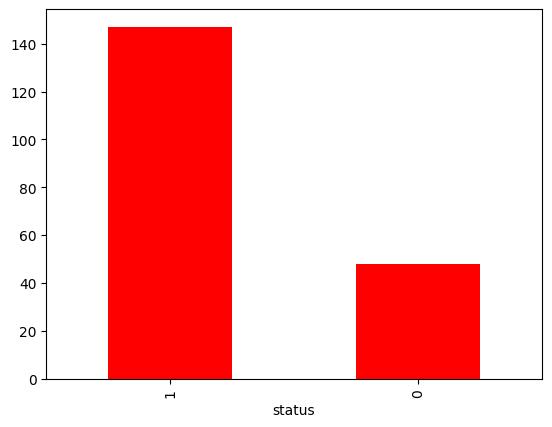

In [344]:
#checking the distribution of target varibale on status column
#valuecounts of 0's and 1's
for i,count in data['status'].value_counts().items():
  print(f'count of {i} : {count}')
print()
data['status'].value_counts().plot(kind='bar',color='red')
plt.show()

In [345]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [346]:
#grouping the dataset based on the target values
# Exclude non-numeric columns
numeric_data = data.select_dtypes(include='number')

# Group by 'status' and calculate the mean
grouped_means = numeric_data.groupby(data['status']).mean()
from IPython.display import display
display(grouped_means)


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.028511,0.011483,24.678750,0.0,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.053027,0.029211,20.974048,1.0,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


In [347]:
#doing data preprocessing
#separate the target_colum into one and remaning columns into another one
#and remove the useless columns that means if will not effect
#on the prediction like name,city_name etc
#Dropping the column put axis = 1 and put axis=0 if you want to drop the rows put axis=0
X=data.drop(columns=['name','status'],axis=1)#independent columns
Y=data['status']#dependent column


In [348]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [349]:
X.size

4290

In [350]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


Spliting the data to training data & test data

In [351]:
#now to split the data into train and split as usally the split will be in range 70 and 20
#and random state is 2 default
#X_train corresponding values in  Y_train
#X_test correspomding values in Y_test
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
print(f"Training set size of X: {X_train.shape[0]} samples")
print(f"Test set size of X: {X_test.shape[0]} samples")
print(f"Training set size of Y: {Y_train.shape[0]} samples")
print(f"Test set size of Y : {Y_test.shape[0]} samples")




Training set size of X: 156 samples
Test set size of X: 39 samples
Training set size of Y: 156 samples
Test set size of Y : 39 samples


In [352]:
X_train

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
123,182.018,197.173,79.187,0.00842,0.00005,0.00506,0.00449,0.01517,0.02503,0.231,...,0.01931,0.04115,0.01813,18.784,0.589956,0.732903,-5.445140,0.142466,2.174306,0.215558
160,114.238,124.393,77.022,0.00581,0.00005,0.00299,0.00316,0.00896,0.04009,0.406,...,0.04114,0.04736,0.02073,20.437,0.653139,0.694571,-5.185987,0.259229,2.151121,0.244948
94,157.821,172.975,68.401,0.00358,0.00002,0.00196,0.00196,0.00587,0.03716,0.307,...,0.02764,0.06185,0.00850,22.219,0.502380,0.712170,-6.251425,0.188056,2.143851,0.160812
57,117.274,129.916,110.402,0.00752,0.00006,0.00299,0.00469,0.00898,0.02293,0.221,...,0.01948,0.03568,0.00681,22.817,0.530529,0.817756,-4.608260,0.290024,2.021591,0.314464
41,184.055,196.537,166.977,0.00258,0.00001,0.00134,0.00147,0.00403,0.01463,0.132,...,0.01234,0.02226,0.00257,26.453,0.306443,0.759203,-7.044105,0.063412,2.361532,0.115730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,241.404,248.834,232.483,0.00281,0.00001,0.00157,0.00173,0.00470,0.01760,0.154,...,0.01251,0.03017,0.00675,23.145,0.457702,0.634267,-6.793547,0.158266,2.256699,0.117399
22,167.930,193.221,79.068,0.00442,0.00003,0.00220,0.00247,0.00661,0.04351,0.377,...,0.04246,0.06685,0.01280,22.468,0.619060,0.679834,-4.330956,0.262384,2.916777,0.285695
72,120.080,139.710,111.208,0.00405,0.00003,0.00180,0.00220,0.00540,0.01706,0.152,...,0.01345,0.02921,0.00442,25.742,0.495954,0.762959,-5.791820,0.329066,2.205024,0.188180
15,142.167,217.455,83.159,0.00369,0.00003,0.00157,0.00203,0.00471,0.01503,0.126,...,0.01359,0.02316,0.00839,25.175,0.565924,0.658245,-5.340115,0.210185,2.205546,0.234589


In [353]:
X_test

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
10,88.333,112.240,84.072,0.00505,0.000060,0.00254,0.00330,0.00763,0.02143,0.197,...,0.01892,0.03237,0.01166,21.118,0.611137,0.776156,-5.249770,0.391002,2.407313,0.249740
79,100.770,115.697,85.545,0.01038,0.000100,0.00622,0.00576,0.01865,0.03121,0.361,...,0.02139,0.05320,0.02220,19.200,0.594387,0.790117,-4.913885,0.265699,2.398422,0.277948
164,102.273,142.830,85.902,0.00907,0.000090,0.00493,0.00461,0.01480,0.02814,0.272,...,0.02073,0.04736,0.03882,18.447,0.671378,0.674562,-2.929379,0.396746,2.560422,0.367233
142,198.458,219.290,148.691,0.00376,0.000020,0.00182,0.00215,0.00546,0.03527,0.297,...,0.02530,0.06165,0.01728,18.702,0.606273,0.661735,-5.585259,0.310746,2.465528,0.209863
186,116.556,592.030,86.228,0.00496,0.000040,0.00254,0.00263,0.00762,0.01660,0.154,...,0.01491,0.02460,0.01397,23.958,0.566424,0.667654,-6.431119,0.153310,2.161936,0.120605
133,118.747,123.723,109.836,0.00331,0.000030,0.00168,0.00171,0.00504,0.01043,0.099,...,0.00903,0.01471,0.00504,25.619,0.482296,0.723096,-6.448134,0.178713,2.034827,0.141422
35,201.464,210.565,195.708,0.00198,0.000010,0.00105,0.00115,0.00314,0.01194,0.107,...,0.00957,0.01758,0.00135,31.732,0.344252,0.742737,-7.777685,0.170183,2.447064,0.057610
137,113.166,130.270,100.673,0.00502,0.000040,0.00257,0.00312,0.00772,0.05279,0.476,...,0.04134,0.08689,0.03690,16.747,0.625362,0.708617,-4.654894,0.304107,2.672362,0.274387
25,104.400,206.002,77.968,0.00633,0.000060,0.00316,0.00375,0.00948,0.03767,0.381,...,0.03780,0.05197,0.02887,22.066,0.522746,0.737948,-5.571843,0.236853,2.846369,0.219514
2,116.682,131.111,111.555,0.01050,0.000090,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634


In [354]:
print(X.shape,X_train.shape,X_test.shape)

(195, 22) (156, 22) (39, 22)


In [355]:
Y_train

123    1
160    1
94     1
57     1
41     1
      ..
43     0
22     1
72     1
15     1
168    0
Name: status, Length: 156, dtype: int64

In [356]:
Y_test

10     1
79     1
164    1
142    1
186    0
133    1
35     0
137    1
25     1
2      1
12     1
128    1
144    1
3      1
48     0
29     1
14     1
119    1
6      1
23     1
108    1
143    1
129    1
174    0
45     0
120    1
173    0
125    1
9      1
163    1
54     1
13     1
109    1
194    0
78     1
114    1
44     0
82     1
158    1
Name: status, dtype: int64

In [357]:
print(Y.size,Y_train.size,Y_test.size)

195 156 39


Datastandardization

In [358]:
# we want all the data into the same range but the meaning of data it convyes
scaler = StandardScaler()
scaler.fit(X_train)




StandardScaler()

In [359]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [360]:
print(X_train)

[[ 0.63239631 -0.02731081 -0.87985049 ... -0.97586547 -0.55160318
   0.07769494]
 [-1.05512719 -0.83337041 -0.9284778  ...  0.3981808  -0.61014073
   0.39291782]
 [ 0.02996187 -0.29531068 -1.12211107 ... -0.43937044 -0.62849605
  -0.50948408]
 ...
 [-0.9096785  -0.6637302  -0.160638   ...  1.22001022 -0.47404629
  -0.2159482 ]
 [-0.35977689  0.19731822 -0.79063679 ... -0.17896029 -0.47272835
   0.28181221]
 [ 1.01957066  0.19922317 -0.61914972 ... -0.716232    1.23632066
  -0.05829386]]


Model trainning

In [361]:
#listing all the classification models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [362]:
#SVC-support vector calssideir
#SVC-support vector regression
model =svm.SVC(kernel='linear')
#traing the model with train data
model.fit(X_train,Y_train)

SVC(kernel='linear')

model evaluation

In [363]:
#Accuracy score on traing data of various models
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(Y_train,X_train_prediction)
print('Accuracy score of training data SVM: ',training_data_accuracy)

Accuracy score of training data SVM:  0.8846153846153846


In [364]:
#testing accuracy on various models
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [365]:
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.8717948717948718


Bulding the predictive system

In [368]:
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = scaler.transform(input_data_reshaped)


prediction = model.predict(std_data)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")

[0]
The Person does not have Parkinsons Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
